# FASTMRI brain: data preparation

### Author: M. Ravasi

Welcome to the "Deep Learning in Scientific Inverse Problems" course!

The aim of this first notebook is to prepare the [FASTMRI](http://fastmri.med.nyu.edu) brain dataset for some of the deep learning and imaging tutorials that will follow.

In [74]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tqdm.notebook import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
# Get a file names
files = glob.glob("multicoil_val/*.h5")

# Load data and extract single slice
brains = []
image_size = (256, 256)
slices = (0, 2, 4)

for file in tqdm(files):
    f = h5py.File(file, 'r')
    data = f['reconstruction_rss']
    nslices = data.shape[0]
    for sl in slices:
        try:
            d = data[sl]
            d = resize(d, image_size, anti_aliasing=True)
            d /= d.max()
            brains.append(d[np.newaxis])
        except:
            pass

brains = np.concatenate(brains, axis=0)
print(f"Number of training samples: {len(brains)}")

Number of training samples: 1380


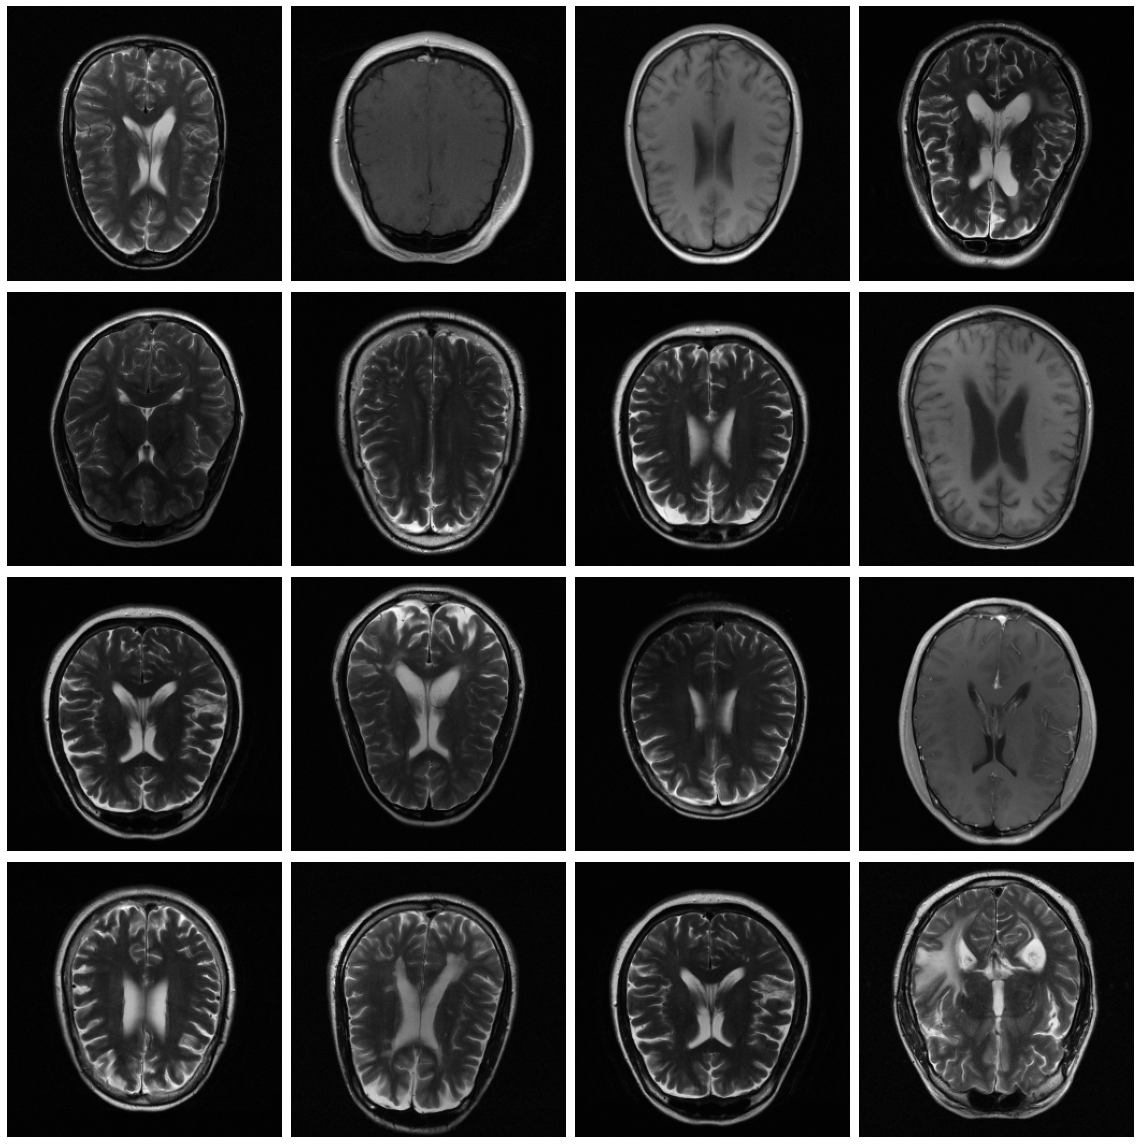

In [76]:
# Display random brain images
iimages = np.random.randint(0, len(brains), 16)
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(16, 16))
axs = axs.ravel()

for iax, iimage in enumerate(iimages):
    axs[iax].imshow(brains[iimage], cmap="gray")
    axs[iax].axis("off")

plt.tight_layout()

In [82]:
# Save images
np.save('brains_trainingdata', brains)